# Export and import from Other live plants group by month and year

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

In [38]:
colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
          '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
          '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
          '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
          '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']

index = 0
country_colors = {}

def return_color(name):
    global index
    if name in country_colors:
        return country_colors[name]
    country_colors[name] = colors[index]
    index += 1
    return country_colors[name]

### TITULO

In [39]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"


data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])

final_data = final_data[final_data["GROUP"] == "Other live plants"]
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO' ,"TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)

USD                                      \
YEAR                             2011        2012        2013        2014   
CODIGO            TYPE                                                      
Araucaria 0.1 m   Export         0.00   214514.29   139882.38   118969.17   
Chrysanthemum sp. Import         0.00    32151.14    54171.59    73746.49   
Dracaena          Import         0.00   564803.70   668431.83  1701199.92   
Lilium sp.        Import         0.00     2794.01     2341.11     7562.47   
Orchids           Import         0.00   526205.66   549593.93   280927.03   
Others            Export  12718317.39   748598.65   987740.30   663631.82   
                  Import   3488342.97  3403003.46  2287738.92  3820145.80   
Rosa sp.          Import      1397.33        0.00     2414.64    16600.98   

                                                              
YEAR                            2015        2016        2017  
CODIGO            TYPE                                        
Araucaria 0.1 m   Export    50290.04   132294.06        0.00  
Chrysanthemum sp. Import    76229.48        0.00    10419.81  
Dracaena          Import   753049.29   513172.97   207810.22  
Lilium sp.        Import    18927.89      636.39        0.00  
Orchids           Import    70812.61   135168.76    69040.48  
Others            Export   496213.72  5307839.73  1218137.96  
                  Import  2494670.42  3245045.14  1076957.86  
Rosa sp.          Import        0.00        0.00     2878.21

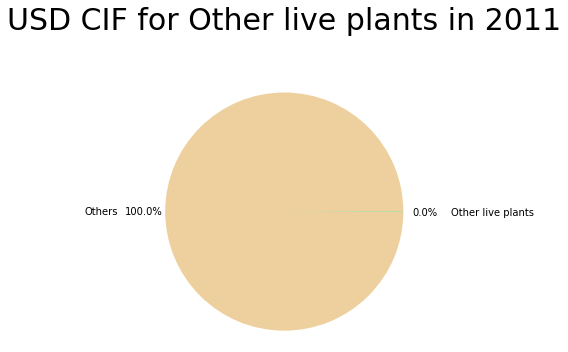

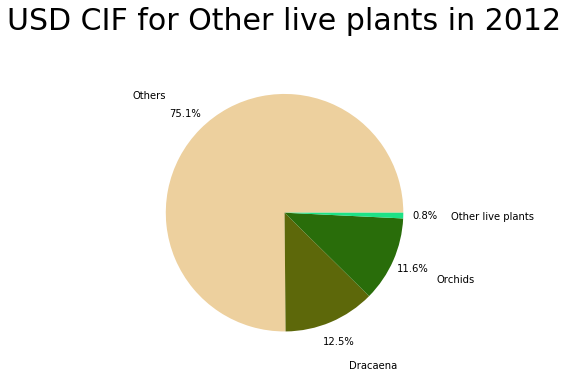

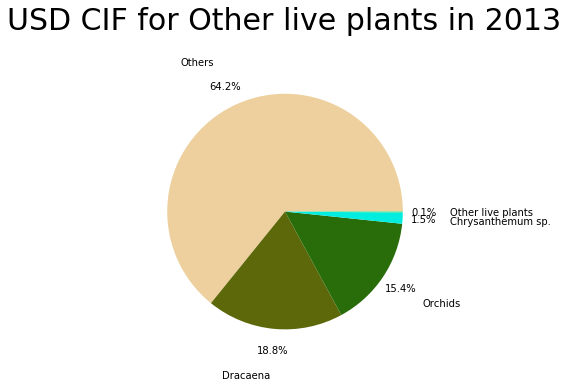

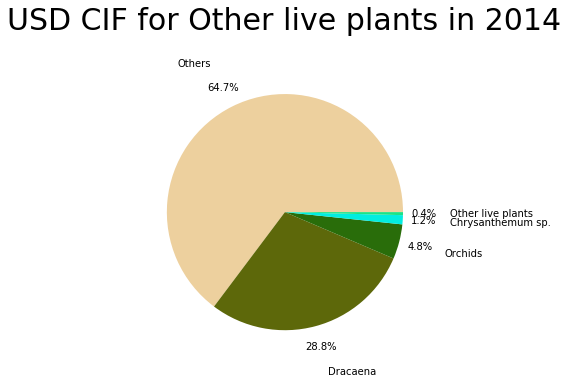

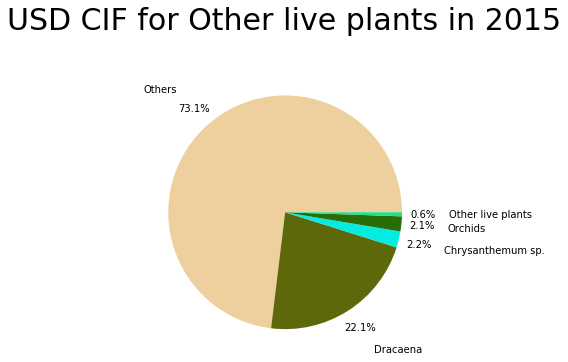

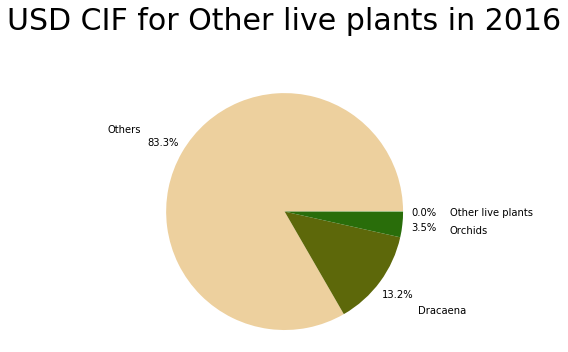

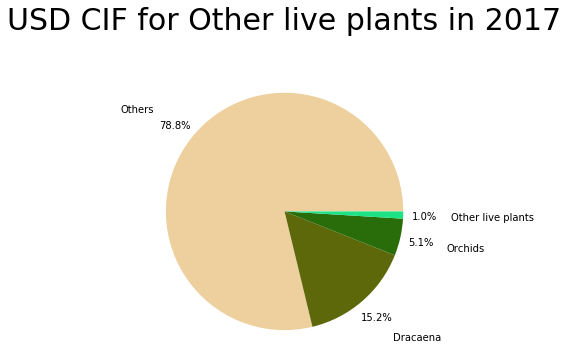

In [40]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other live plants"

filename = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"
usecols =  ["CIF", "ARANC_NAC", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Other live plants"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['ARANC_NAC']).sum().reset_index()
            total = sums["CIF"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "CIF"]].groupby("COUNTRY").sum()
            #slices = aux.sort_values()
            
            aux = aux.sort_values("CIF", ascending=False)
            
            
            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)
            

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.7, 1))
            
            plt.title("USD CIF for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD CIF for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()

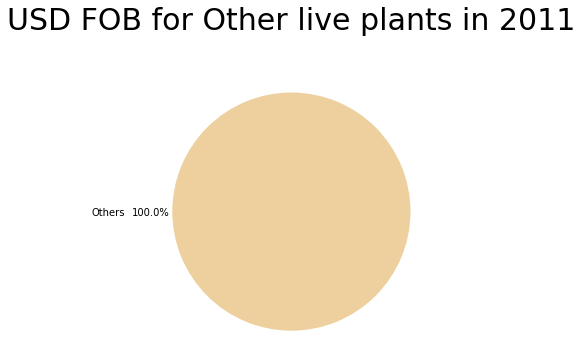

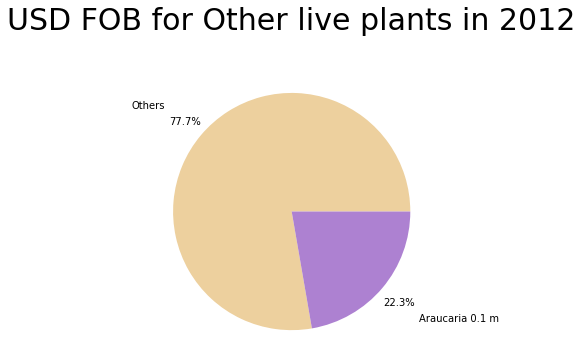

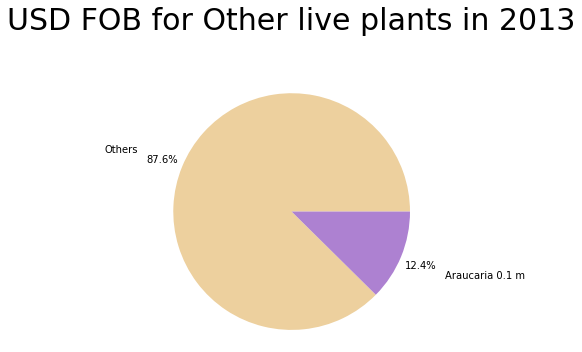

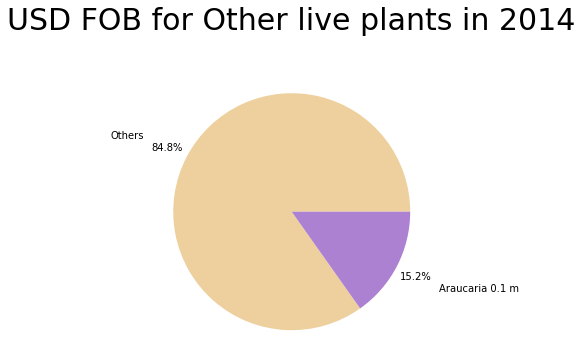

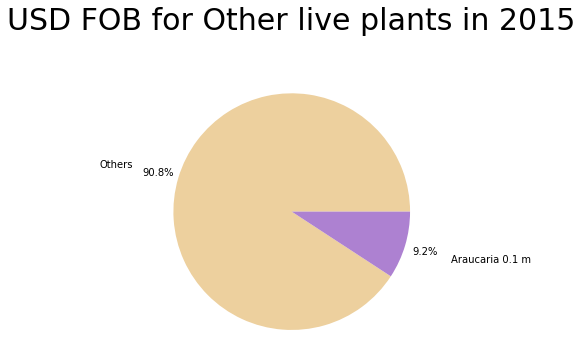

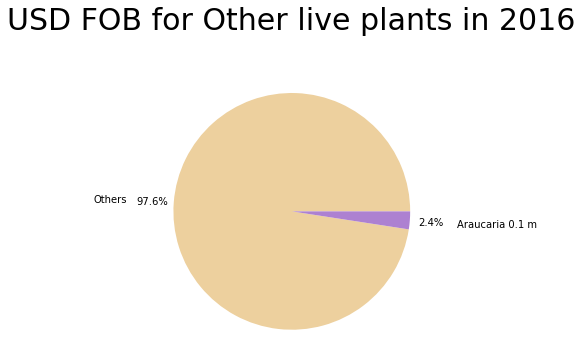

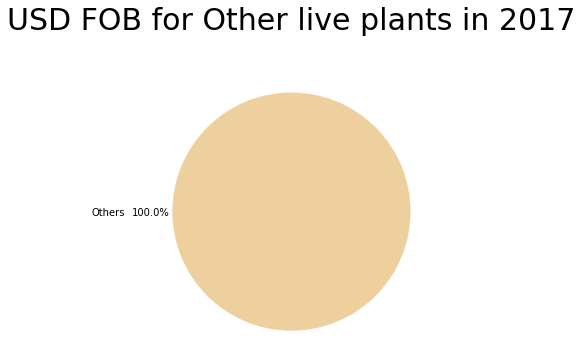

In [41]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other live plants"

filename = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
usecols =  ["TOTALVALORFOB", "CODIGOARANCEL", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Other live plants"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['CODIGOARANCEL']).sum().reset_index()
            total = sums["TOTALVALORFOB"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "TOTALVALORFOB"]].groupby("COUNTRY").sum()
            #slices = aux.sort_values()
            
            aux = aux.sort_values("TOTALVALORFOB", ascending=False)
            
            
            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)
            

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.7, 1))
            
            plt.title("USD FOB for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD FOB for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()